In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

In [2]:
# Validation run number
run = 8

# Load the np array from the disk into memory
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

# Validate the shapes of the loaded array
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


In [3]:
print("ROC curve statistics for electron :", fpr_1, tpr_1, threshold_1)

NameError: name 'fpr_1' is not defined

In [5]:
print(len(fpr_1))
print(len(tpr_1))
print(len(threshold_1))

26631
26631
26631


In [6]:
print(tpr_1[:100])

[0.00000000e+00 3.34381061e-05 3.34381061e-05 4.01257273e-04
 4.01257273e-04 4.34695379e-04 5.01571591e-04 6.35324015e-04
 7.02200227e-04 8.69390758e-04 9.36266970e-04 1.03658129e-03
 1.10345750e-03 1.17033371e-03 1.23720992e-03 1.30408614e-03
 1.30408614e-03 2.03972447e-03 2.10660068e-03 2.14003879e-03
 2.17347689e-03 2.24035311e-03 2.40754364e-03 2.47441985e-03
 2.47441985e-03 2.74192470e-03 2.74192470e-03 2.80880091e-03
 2.80880091e-03 2.90911523e-03 2.97599144e-03 3.17662008e-03
 3.24349629e-03 3.24349629e-03 3.34381061e-03 3.34381061e-03
 3.47756303e-03 3.47756303e-03 3.51100114e-03 3.51100114e-03
 3.61131546e-03 3.61131546e-03 3.81194409e-03 3.81194409e-03
 3.84538220e-03 3.97913462e-03 3.97913462e-03 4.07944894e-03
 4.07944894e-03 4.24663947e-03 4.31351568e-03 4.34695379e-03
 4.44726811e-03 4.51414432e-03 4.54758242e-03 4.54758242e-03
 4.61445864e-03 4.61445864e-03 4.81508727e-03 4.84852538e-03
 4.84852538e-03 4.91540159e-03 4.98227780e-03 5.28322076e-03
 5.28322076e-03 5.350096

In [8]:
threshold_index_dict = {}
tpr_values = [0.2, 0.5, 0.8]

for tpr_value in tpr_values:
    
    index_list = []
    
    for i in range(len(tpr_1)):
        if(math.fabs(tpr_1[i]-tpr_value) < 0.001):
            index_list.append(i)
        
    index = index_list[math.ceil(len(index_list)/2)]
    threshold_index_dict[tpr_value] = index
    
print(threshold_index_dict)
    
thresholds = []
for key in threshold_index_dict.keys():
    print("For TPR = {0}, threshold = {1:0.3f}".format(key, threshold_1[threshold_index_dict[key]]))
    thresholds.append(threshold_1[threshold_index_dict[key]])

{0.2: 3178, 0.5: 8988, 0.8: 18280}
For TPR = 0.2, threshold = 0.992
For TPR = 0.5, threshold = 0.823
For TPR = 0.8, threshold = 0.167


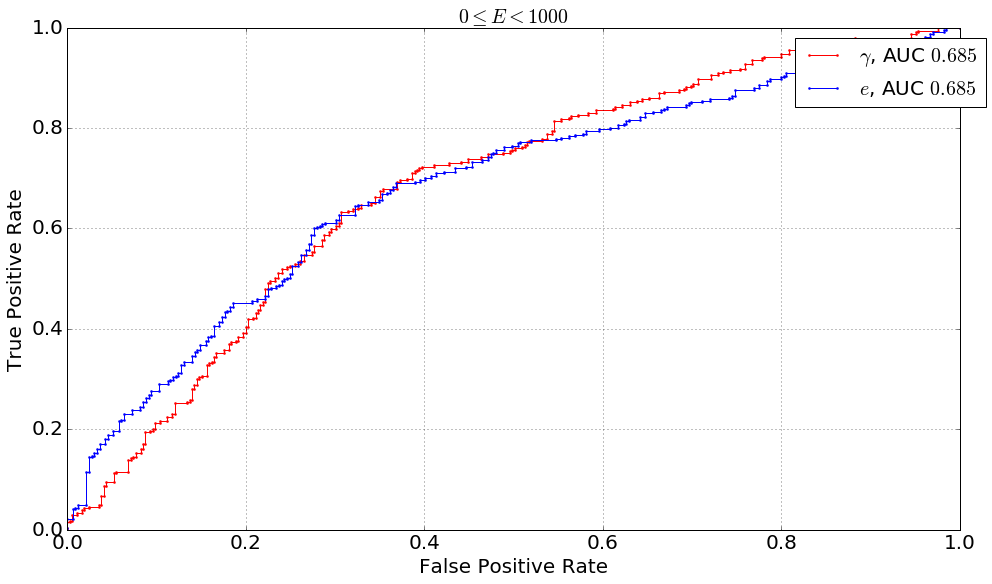

(array([0.        , 0.        , 0.        , 0.00273973, 0.00273973,
        0.00547945, 0.00547945, 0.0109589 , 0.0109589 , 0.01643836,
        0.01643836, 0.01917808, 0.01917808, 0.02465753, 0.02465753,
        0.03561644, 0.03561644, 0.03835616, 0.03835616, 0.04109589,
        0.04109589, 0.04383562, 0.04383562, 0.05205479, 0.05205479,
        0.05479452, 0.05479452, 0.06849315, 0.06849315, 0.07123288,
        0.07123288, 0.0739726 , 0.0739726 , 0.07671233, 0.07671233,
        0.08219178, 0.08219178, 0.08493151, 0.08493151, 0.08767123,
        0.08767123, 0.09315068, 0.09315068, 0.09589041, 0.09589041,
        0.09863014, 0.09863014, 0.10410959, 0.10410959, 0.11232877,
        0.11232877, 0.11780822, 0.11780822, 0.12054795, 0.12054795,
        0.13424658, 0.13424658, 0.1369863 , 0.1369863 , 0.13972603,
        0.13972603, 0.14246575, 0.14246575, 0.14520548, 0.14520548,
        0.14794521, 0.14794521, 0.15068493, 0.15068493, 0.15616438,
        0.15616438, 0.15890411, 0.15890411, 0.16

In [6]:
plot_utils.plot_ROC_curve_one_vs_one(softmaxes[:1000], labels[:1000], energies[:1000], {"gamma":0,"e":1}, "gamma", "e", 0, 1000, show_plot=True)

In [3]:
plot_utils.plot_signal_efficiency(softmaxes[:1000], labels[:1000], energies[:1000], index_dict={"gamma":0, "e":1},
                                     event="e", energy_interval=100, num_bins=100, show_plot=True, save_path=None)

NameError: name 'total_true_events' is not defined

<Figure size 2304x1296 with 0 Axes>

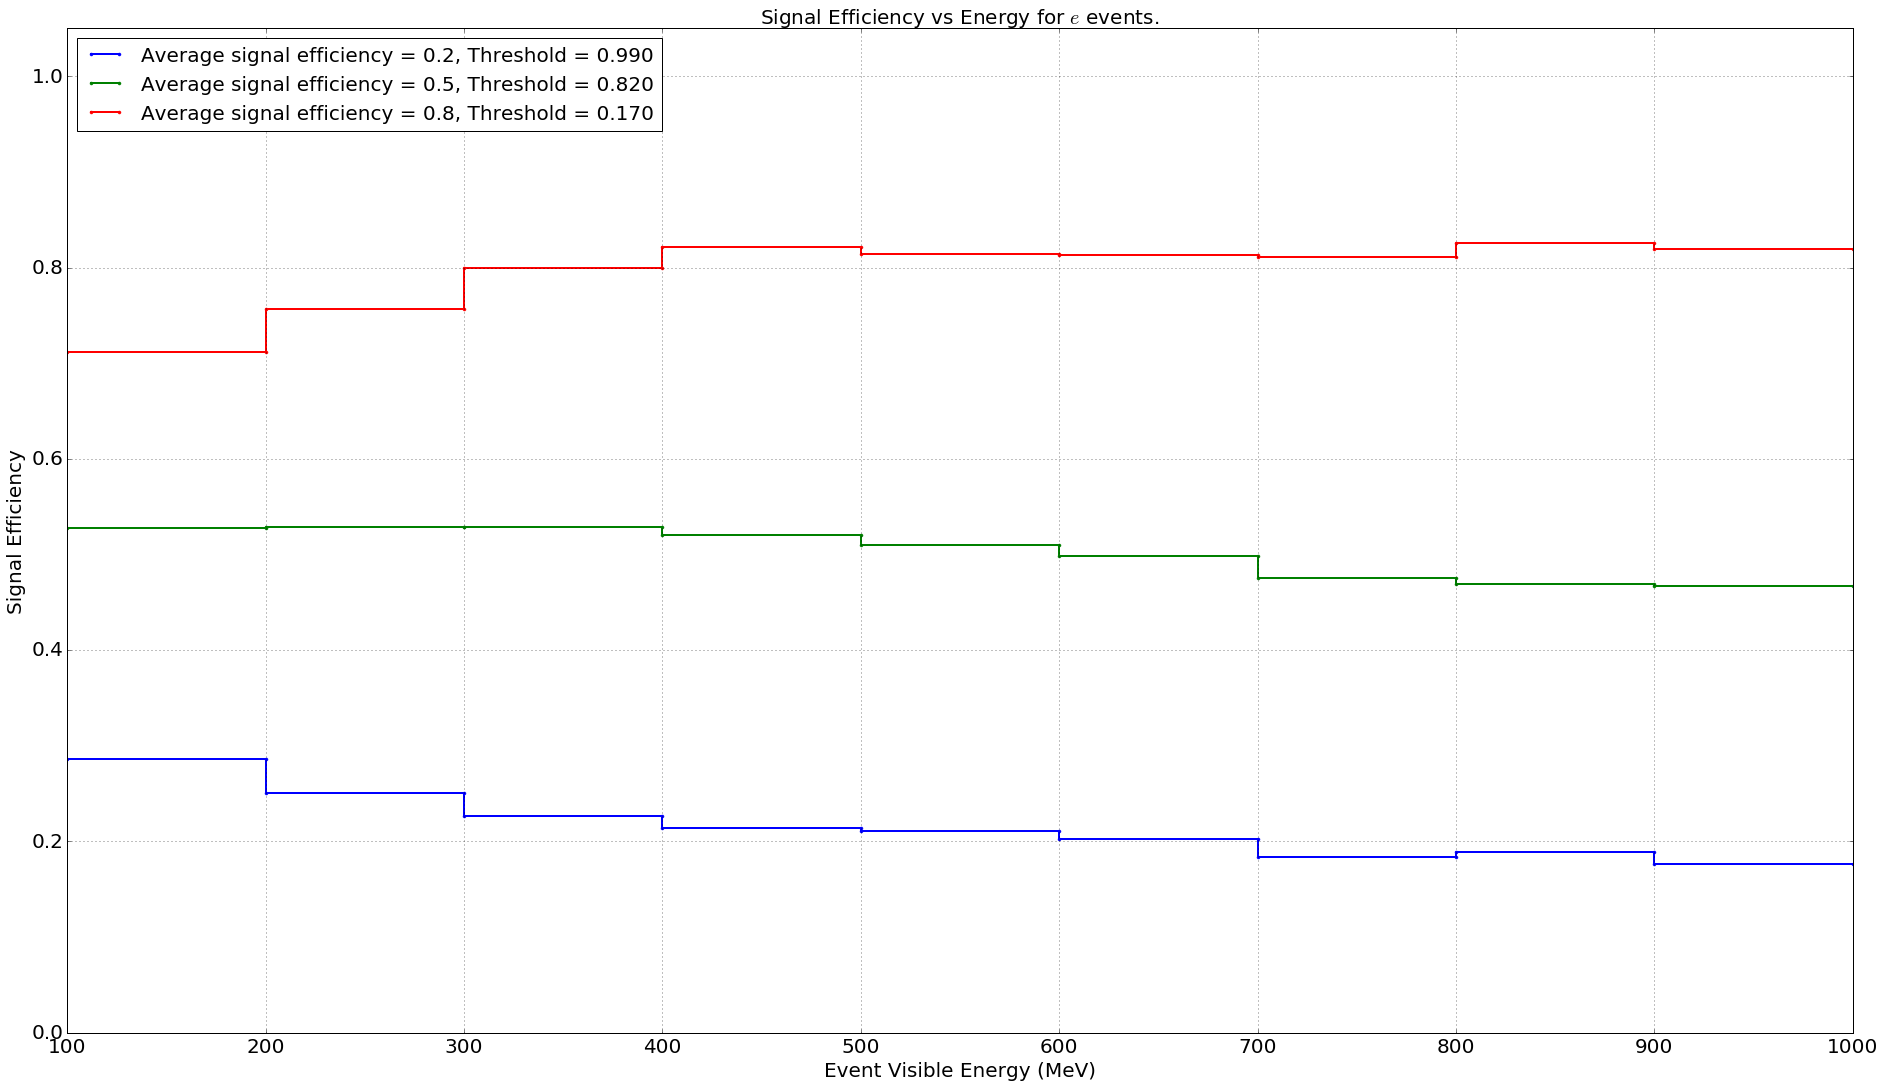

In [7]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     event="e", energy_interval=100, num_bins=100, show_plot=True, save_path=None)

In [3]:
plot_utils.plot_signal_efficiency(None, None, energies, index_dict={"gamma":0, "mu":2},
                                     event="mu", energy_interval=100, num_bins=100, show_plot=True, save_path=None)

AssertionError: 

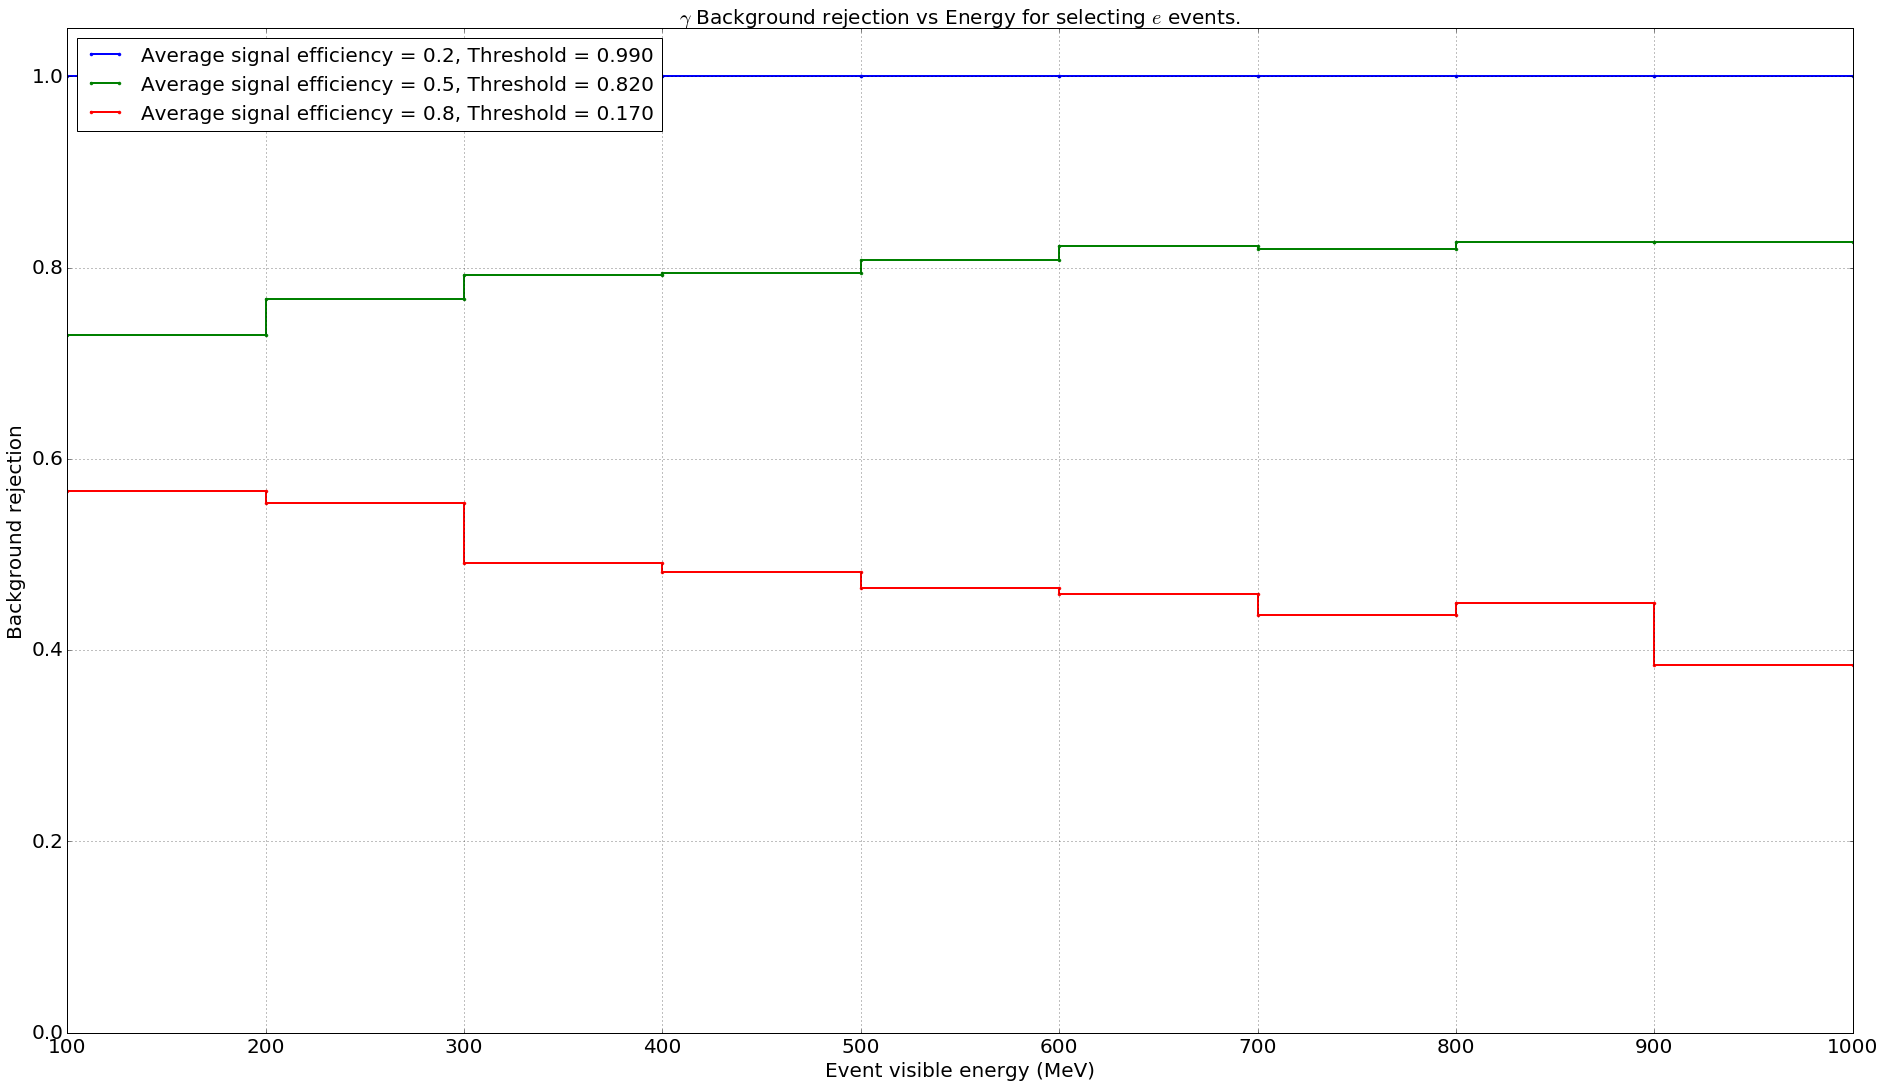

In [5]:
plot_utils.plot_background_rejection(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     event="e", energy_interval=100, num_bins=100, save_path=None)

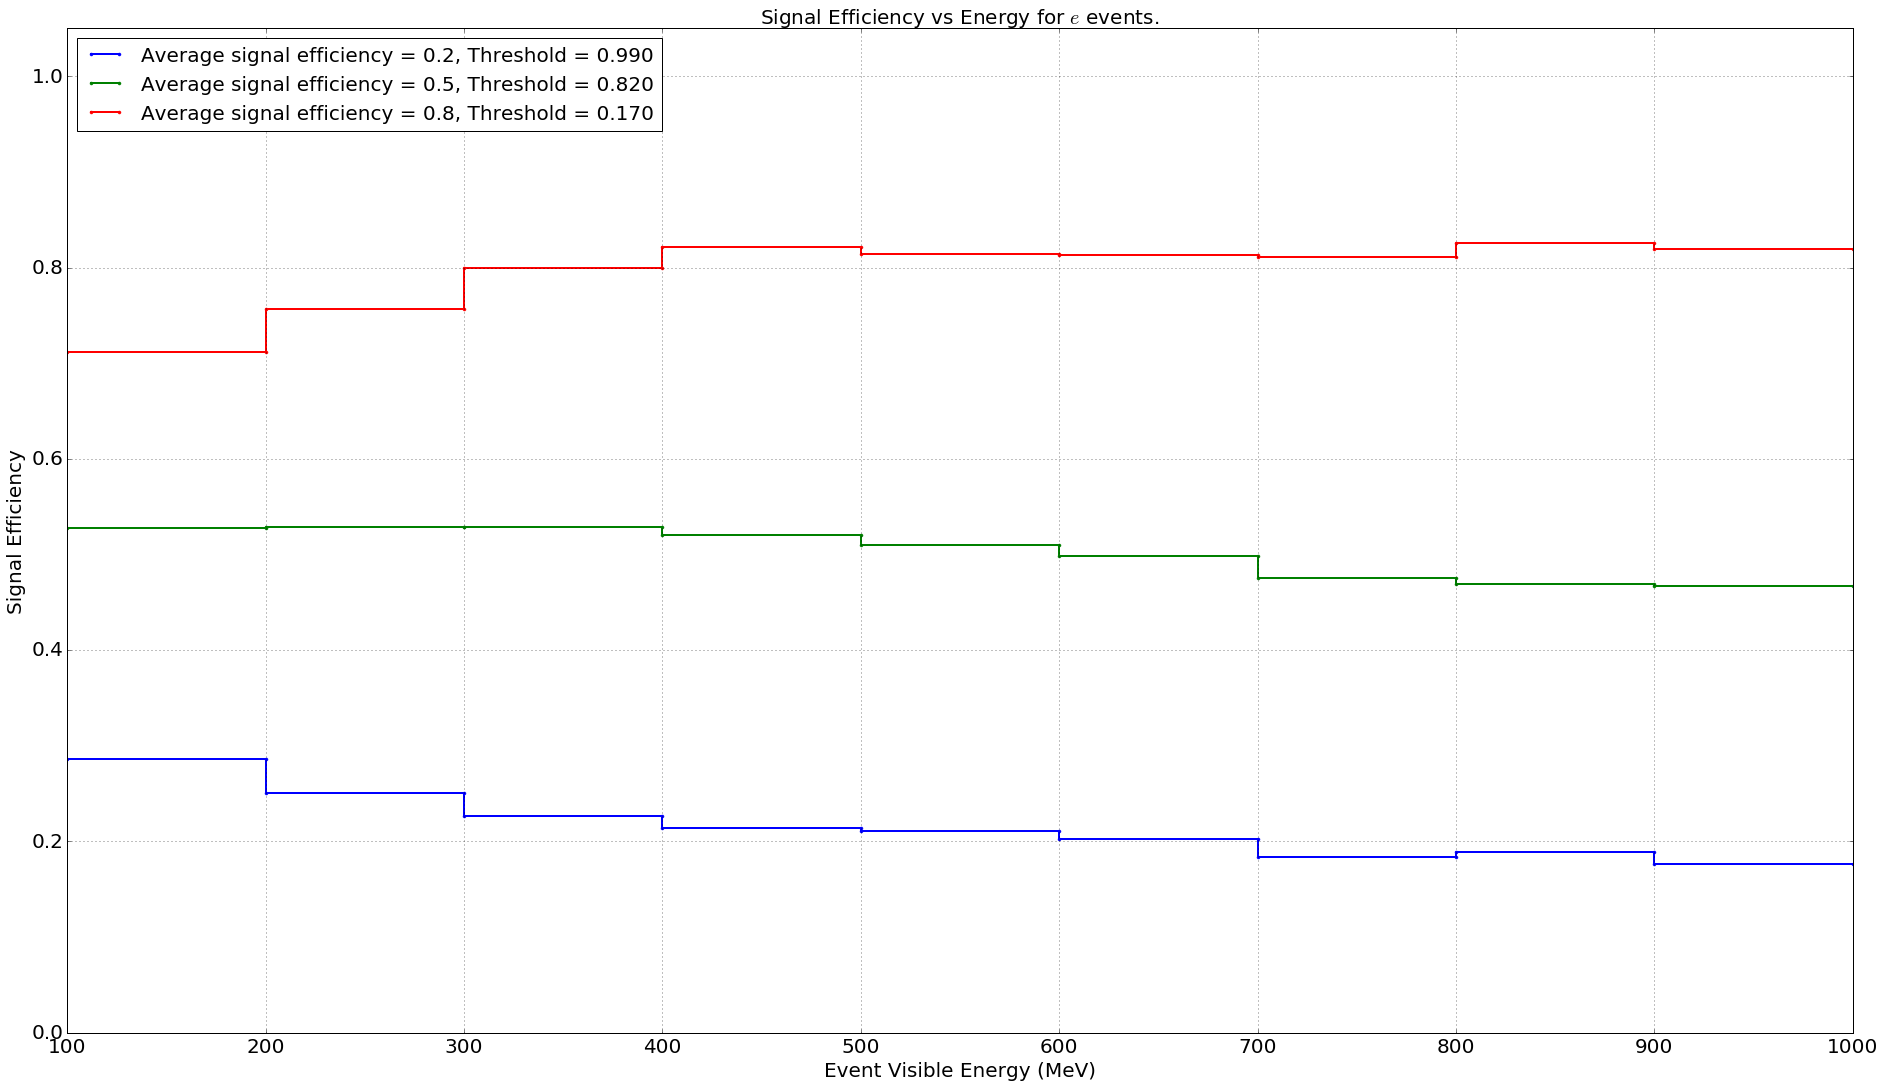

In [6]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     event="e", energy_interval=100, num_bins=100, show_plot=True, save_path=None)